Here is a brief overview of each column in the dataset, along with its data type:

| Column Name | Data Type            | Description      | 
|-------------|----------------------|------------------|
| Energy      | `numpy.float64`      | VASP total energy| 
| AdsE        | `numpy.float64`      | AdsE = Energy - E<sub>_clean-NP</sub> - E<sub>CO</sub>(g) |
| ads_site    | `str`                | Identity of Metal binding CO |
| atoms_opt   | `ase.atoms.Atoms`    | Atomic object of VASP optimized structure |
| M_Ag        | `numpy.int64`        | binary, metal at adsorption site |
| M_Au        | `numpy.int64`        |  |
| M_Cu        | `numpy.int64`        | |
| M_Pd        | `numpy.int64`        | |
| M_Pt        | `numpy.int64`        | |
| S_Ag        | `numpy.int64`        | Count of surface atoms neighboring adsorption metal atom |
| S_Au        | `numpy.int64`        | |
| S_Cu        | `numpy.int64`        | |
| S_Pd        | `numpy.int64`        | |
| S_Pt        | `numpy.int64`        | |
| B_Ag        | `numpy.int64`        | Count of subsurface atoms neighboring adsorption metal atom |
| B_Au        | `numpy.int64`        | |
| B_Cu        | `numpy.int64`        | |
| B_Pd        | `numpy.int64`        | |
| B_Pt        | `numpy.int64`        | |
| NP          | `str`                | NP's identifier, main text |

In [4]:
import pandas as pd

df = pd.read_pickle('dataset_with_features.pkl')
df

,Energy,AdsE,ads_site,atoms_opt,M_Ag,M_Au,M_Cu,M_Pd,M_Pt,S_Ag,S_Au,S_Cu,S_Pd,S_Pt,B_Ag,B_Au,B_Cu,B_Pd,B_Pt,NP
0,-185.817584,-0.301584,Ag,"(Atom('Pt', [12.3897, 9.95906, 11.36034], inde...",1,0,0,0,0,2,1,1,1,1,0,0,1,0,1,C
1,-185.993973,-0.477973,Ag,"(Atom('Pt', [12.27244, 9.96688, 11.42591], ind...",1,0,0,0,0,0,2,0,2,1,0,0,0,1,0,C
2,-186.119332,-0.603332,Ag,"(Atom('Pt', [12.28301, 9.96258, 11.42059], ind...",1,0,0,0,0,1,3,1,0,0,0,0,0,0,1,C
3,-185.943338,-0.427338,Ag,"(Atom('Pt', [12.27788, 9.9607, 11.42709], inde...",1,0,0,0,0,1,1,1,2,0,1,0,0,0,0,C
4,-185.690539,-0.174539,Ag,"(Atom('Pt', [12.26881, 9.95039, 11.42492], ind...",1,0,0,0,0,1,1,1,2,1,1,1,0,0,0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,-186.823647,-1.886647,Pt,"(Atom('Ag', [12.24707, 10.03047, 11.38592], in...",0,0,0,0,1,0,2,1,1,2,0,2,0,0,0,G
330,-186.885309,-1.948309,Pt,"(Atom('Ag', [12.25903, 10.02402, 11.45003], in...",0,0,0,0,1,2,1,0,2,1,1,1,0,0,0,G
331,-186.885671,-1.948671,Pt,"(Atom('Ag', [12.24492, 10.0255, 11.36371], ind...",0,0,0,0,1,1,1,2,1,1,0,1,0,1,0,G
332,-186.862914,-1.925914,Pt,"(Atom('Ag', [12.1928, 10.0371, 11.40651], inde...",0,0,0,0,1,0,2,1,2,1,0,1,0,0,1,G


In [5]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np

features_to_use = []
for col in df.columns:
    if 'M_' in col or 'S_' in col or 'B_' in col:     
        features_to_use.append(col)

X = df[features_to_use]
y = df['AdsE']

cv_score_mae = cross_val_score(LinearRegression(), X, y, cv=10, scoring='neg_mean_absolute_error')
print('MEAN ABSOLUTE ERROR')
print(f'Cross validation scores: {-cv_score_mae}')
print(f'Mean cv: {np.mean(-cv_score_mae):.3f} +/- {np.std(cv_score_mae):.3f}')
print('-------------------------------------------')
# print root mean squared error
cv_score_rmse = cross_val_score(LinearRegression(), X, y, cv=10, scoring='neg_root_mean_squared_error')
print('ROOT MEAN SQUARED ERROR')
print(f'Cross validation scores: {-cv_score_rmse}')
print(f'Mean cv: {np.mean(-cv_score_rmse):.3f} +/- {np.std(cv_score_rmse):.3f}')
print('-------------------------------------------')

MEAN ABSOLUTE ERROR
Cross validation scores: [0.08162243 0.09946497 0.10235483 0.08690149 0.09160016 0.10232565
 0.11614177 0.08167634 0.07896116 0.10514013]
Mean cv: 0.095 +/- 0.012
-------------------------------------------
ROOT MEAN SQUARED ERROR
Cross validation scores: [0.1067829  0.14089625 0.12405629 0.11087865 0.11936472 0.15578904
 0.14491166 0.09561392 0.10346252 0.15773922]
Mean cv: 0.126 +/- 0.021
-------------------------------------------


MAE (test) = 0.0952 eV


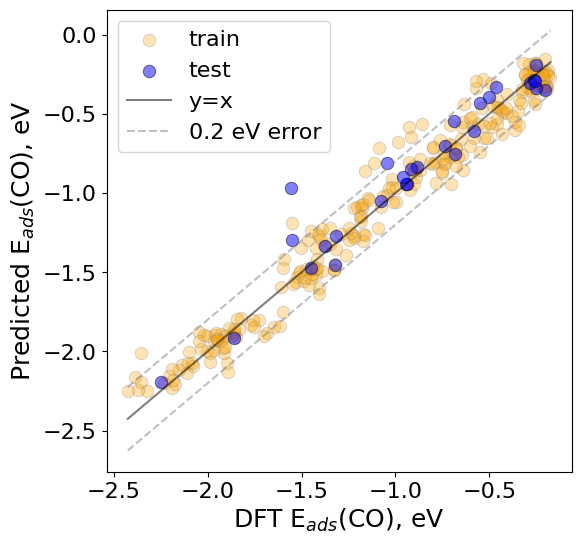

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

model = LinearRegression()

model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

fig, ax = plt.subplots(figsize=(6, 6))

sns.scatterplot(x=y_train, y=y_train_pred, ax=ax, s=80, color='orange', alpha=0.3, label='train', edgecolor='gray')
sns.scatterplot(x=y_test, y=y_pred, ax=ax, s=80, color='blue', alpha=0.5, label='test', edgecolor='black')
sns.lineplot(x=y_train, y=y_train, ax=ax, color='black', alpha=0.5, label='y=x')

## Add two diagonal lines to show the error (0.2 eV tolerance)
# Upper line
sns.lineplot(x=y_train, y=y_train + 0.2, ax=ax, color='gray', linestyle='dashed', alpha=0.5, label='0.2 eV error')
# Lower line
sns.lineplot(x=y_train, y=y_train - 0.2, ax=ax, color='gray', linestyle='dashed', alpha=0.5,)

ax.tick_params(axis='both', which='major', labelsize=16)

# Set the labels
ax.set_xlabel(r'DFT E$_{ads}$(CO), eV', fontsize=18)
ax.set_ylabel(r'Predicted E$_{ads}$(CO), eV', fontsize=18)

ax.legend(fontsize=16)


_mae = np.mean(abs(y_test - y_pred))
print(f'MAE (test) = {_mae:4.3} eV')

# Monte-Carlo generated Site motifs

## Functions

In [21]:
import pandas as pd
import random

# ase: adsorption site ensemble
def translate_ase_to_features(row):
    # Create a new DataFrame with the same columns as df_permut
    new_row = {}
    for m in ['Ag', 'Au', 'Cu', 'Pd', 'Pt']:
        new_row[f'M_{m}'] = 0
        new_row[f'B_{m}'] = 0
        new_row[f'S_{m}'] = 0

    for col in row.index:
        # if not string
        if type(row[col]) is not str:
            continue
        
        metal = row[col]
        if col.startswith('centre_'):
            new_row[f'M_{metal}'] += 1
        elif col.startswith('surf_'):
            new_row[f'S_{metal}'] += 1 
        elif col.startswith('bulk_'):
            new_row[f'B_{metal}'] += 1
        else:
            continue

    return new_row

# Function to generate the Adsorption site motifs varying the composition of Ag, Au, and Cu. 
# Pd and Pt proportions are fixed

def monte_carlo_motif_gen(n_total=10000, corner_rat=12/42, min_p=0, max_p=60, step=5):
    
    n_corner = int( n_total * corner_rat )
    
    list_adssiteens = []
    for Ag_p in range(min_p, max_p+1, step):
        for Au_p in range(min_p, max_p-Ag_p+1, step):
                    Cu_p = max_p - Ag_p - Au_p
                    Pd_p = (100 - max_p) / 2
                    Pt_p = (100 - max_p) / 2
                    if 0 <= Cu_p <= max_p:
                        formulation = {'Ag': Ag_p, 'Au': Au_p, 'Cu': Cu_p, 'Pd': Pd_p, 'Pt': Pt_p}

                        m_rnd_ranges = {}
                        saved = 0
                        for m, perc in formulation.items():
                            m_rnd_ranges[m] = [saved, saved + perc/100]
                            saved += perc/100

                        for i in range(n_total):
                            if i < n_corner:
                                site_label = 'site_centralat_cn6'
                                site_ensemble = ads_site_ensm_dic[site_label].copy()

                                for site in site_ensemble.keys():
                                    rnd_num = random.random()
                                    for m in formulation.keys():
                                        if m_rnd_ranges[m][0] <= rnd_num < m_rnd_ranges[m][1]:
                                            site_ensemble[site] = m
                                            break

                            if i >= n_corner:
                                site_label = 'site_centralat_cn8'
                                site_ensemble = ads_site_ensm_dic[site_label].copy()
                                
                                for site in site_ensemble.keys():
                                    rnd_num = random.random()
                                    for m in formulation.keys():
                                        if m_rnd_ranges[m][0] <= rnd_num < m_rnd_ranges[m][1]:
                                            site_ensemble[site] = m
                                            break
                            for f in formulation.keys():
                                site_ensemble[f] = formulation[f]

                            list_adssiteens.append(site_ensemble)                

    df = pd.DataFrame(list_adssiteens)
    column_order = ['Ag', 'Au', 'Cu', 'Pd', 'Pt', 'centre_c', 'centre_e', 'surf_e_1', 'surf_e_2', 'surf_e_3', 'surf_e_4', 'surf_e_5', 'surf_c_5', 'surf_c_6', 'bulk_1', 'bulk_2']
    df = df[column_order]
    return df

def ternary_plot(df, column_name, total=60, max_lvl=25, num_lv=26, n_ticks=5, ref_point={'Au':10, 'Ag':10, 'Cu':10}):
    # Ternary plot setup
    total = total
    fraction_Cu = df['Cu'] / total
    fraction_Ag = df['Ag'] / total
    fraction_Au = df['Au'] / total

    x = fraction_Ag + 0.5 * fraction_Au
    y = (np.sqrt(3) / 2) * fraction_Au
    z = df[column_name]

    triangulation = tri.Triangulation(x, y)

    # Levels for the plot
    lv_down = 0
    lv_up = max_lvl
    num_lv = num_lv
    levels = np.linspace(lv_down, lv_up, num_lv)

    fig, ax = plt.subplots(figsize=(14, 6))
    contour = ax.tricontourf(triangulation, z, levels=levels, cmap='plasma', vmin=lv_down, vmax=lv_up)
    ax.scatter(x, y, c='k', s=15, edgecolors='white')

    cbar = fig.colorbar(contour, ax=ax, pad=0.1, extend='max')
    cbar.set_label(column_name)
    cbar.set_ticks(np.arange(0, lv_up+1, 5))

    # Draw triangle boundary
    vertices = np.array([[0, 0], [1, 0], [0.5, np.sqrt(3)/2], [0, 0]])
    ax.plot(vertices[:, 0], vertices[:, 1], 'k-', lw=1.2)

    # Tick marks
    n_ticks = n_ticks
    ticks = np.linspace(0, 1, n_ticks)
    for t in ticks:
        pct = int(t * total)
        # Bottom edge
        xb, yb = t, 0
        ax.plot([xb, xb], [0, -0.015], 'k-')
        ax.text(xb, -0.04, f'{pct}', ha='center', va='top')
        # Right edge
        xr = 1 - 0.5 * t
        yr = (np.sqrt(3)/2) * t
        ax.plot([xr, xr + 0.015], [yr, yr], 'k-')
        ax.text(xr + 0.035, yr, f'{pct}', va='center', ha='left')
        # Left edge
        xl = 0.5 * (1 - t)
        yl = (np.sqrt(3)/2) * (1 - t)
        ax.plot([xl, xl - 0.015], [yl, yl], 'k-')
        ax.text(xl - 0.035, yl, f'{pct}', va='center', ha='right')

    # Corner labels
    ax.text(-0.06, -0.05, 'Cu', ha='center', va='top')
    ax.text(1.06, -0.05, 'Ag', ha='center', va='top')
    ax.text(0.5, np.sqrt(3)/2 + 0.04, 'Au', ha='center', va='bottom')

    # Select a random interior point (Ag > 0, Au > 0, Cu > 0)
    mask_int = (df['Ag'] == ref_point['Ag']) & (df['Au'] == ref_point['Au']) & (df['Cu'] == ref_point['Cu'])
    interior_indices = df.index[mask_int].tolist()
    idx = random.choice(interior_indices)

    # Fetch its coords and data
    x0, y0 = x.iloc[idx], y.iloc[idx]
    comp = df.loc[idx, ['Ag', 'Au', 'Cu']]
    z0 = z.iloc[idx]

    # Then continue marking/annotating as before…
    ax.scatter([x0], [y0], color='red', s=100, zorder=5)
    # … arrows, legend, etc.

    # Compute endpoints where rays from (x0,y0) parallel to each edge hit the boundary

    sqrt3 = np.sqrt(3)

    # 1) Horizontal ray to the right (parallel to bottom edge y=0)
    #    meets right edge y = -sqrt3*x + sqrt3
    x_r = (sqrt3 - y0) / sqrt3
    y_r = y0

    # 2) Ray parallel to right edge (direction = (-0.5, +sqrt3/2))
    #    meets left edge y = sqrt3*x
    t_ul = (sqrt3 * x0 - y0) / sqrt3
    x_ul = x0 - 0.5 * t_ul
    y_ul = y0 + (sqrt3/2) * t_ul

    # 3) Ray parallel to left edge (direction = (-0.5, -sqrt3/2))
    #    meets bottom edge y = 0
    t_dl = y0 / (sqrt3/2)
    x_dl = x0 - 0.5 * t_dl
    y_dl = 0.0

    # Draw the three colored arrows
    ax.annotate('', xy=(x_r,  y_r),  xytext=(x0, y0),
                arrowprops=dict(arrowstyle='->', color='blue',  lw=2))
    ax.annotate('', xy=(x_ul, y_ul), xytext=(x0, y0),
                arrowprops=dict(arrowstyle='->', color='green', lw=2))
    ax.annotate('', xy=(x_dl, y_dl), xytext=(x0, y0),
                arrowprops=dict(arrowstyle='->', color='red',   lw=2))


    # Annotate selected composition below plot
    info = (
        f"Random Point Selected:\n"
        f"Selected Index: {idx}    "
        f"Ag: {comp['Ag']}%, Au: {comp['Au']}%, Cu: {comp['Cu']}%    "
        f"Percentage: {z0:.2f}%"
    )
    fig.text(0.52, -0.05, info, ha='center', va='top')

    ax.set_aspect('equal')
    ax.axis('off')
    plt.tight_layout()
    plt.show()

# Define the dictionary for the adsorption sites, surface and bulk neighbors distinguished
# Also distinguished between neighbors with CN=6 (corner, "c") and CN=8 (edge, "e")
ads_site_ensm_dic = {
            'site_centralat_cn6': {
                'centre_c': None,
                'surf_e_1': None,
                'surf_e_2': None,
                'surf_e_3': None,
                'surf_e_4': None,
                'surf_e_5': None,
                'bulk_1': None,
            },
            'site_centralat_cn8': {
                'centre_e': None,
                'surf_e_1': None,
                'surf_e_2': None,
                'surf_e_3': None,
                'surf_e_4': None,
                'surf_c_5': None,
                'surf_c_6': None,
                'bulk_1': None,
                'bulk_2': None,
            },
}

## Pd = Pt = 20 %

In [12]:
df_ase_pdpt_20 = monte_carlo_motif_gen(n_total=10000, corner_rat=12/42, min_p=0, max_p=60, step=5)
_df = df_ase_pdpt_20.apply(translate_ase_to_features, axis=1)
_df = pd.DataFrame(_df.tolist())

df_ase_pdpt_20 = pd.concat([df_ase_pdpt_20, _df], axis=1)

df_ase_pdpt_20

,Ag,Au,Cu,Pd,Pt,centre_c,centre_e,surf_e_1,surf_e_2,surf_e_3,...,S_Au,M_Cu,B_Cu,S_Cu,M_Pd,B_Pd,S_Pd,M_Pt,B_Pt,S_Pt
0,0,0,60,20.0,20.0,Cu,NaN,Pd,Pd,Cu,...,0,1,0,3,0,0,2,0,1,0
1,0,0,60,20.0,20.0,Cu,NaN,Cu,Pt,Cu,...,0,1,1,4,0,0,0,0,0,1
2,0,0,60,20.0,20.0,Pd,NaN,Pt,Cu,Cu,...,0,0,1,2,1,0,1,0,0,2
3,0,0,60,20.0,20.0,Pd,NaN,Cu,Cu,Cu,...,0,0,1,5,1,0,0,0,0,0
4,0,0,60,20.0,20.0,Cu,NaN,Pd,Cu,Cu,...,0,1,0,2,0,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909995,60,0,0,20.0,20.0,NaN,Pd,Ag,Pt,Pt,...,0,0,0,0,1,1,0,0,0,4
909996,60,0,0,20.0,20.0,NaN,Ag,Ag,Pt,Ag,...,0,0,0,0,0,0,1,0,0,2
909997,60,0,0,20.0,20.0,NaN,Ag,Ag,Pt,Pd,...,0,0,0,0,0,1,2,0,0,1
909998,60,0,0,20.0,20.0,NaN,Ag,Pd,Ag,Ag,...,0,0,0,0,0,0,2,0,1,0


In [ ]:
# Use the Features df to predict the new Ads E
features_to_use = []
for col in df_ase_pdpt_20.columns:
    if 'M_' in col or 'S_' in col or 'B_' in col:
        features_to_use.append(col)

df_ase_pdpt_20['E_ads'] = model.predict(df_ase_pdpt_20[X_train.columns])

# Define the composition columns
composition_cols = ['Ag', 'Au', 'Cu', 'Pd', 'Pt']

# Create a boolean mask for E_ads between -0.6 and -0.4
mask = df_ase_pdpt_20['E_ads'].between(-0.6, -0.4)

# Group by the full composition tuple and compute the percentage in the range
summary_df = (
    df_ase_pdpt_20
    .groupby(composition_cols)
    .apply(lambda grp: grp.loc[mask, 'E_ads'].count() * 100 / len(grp))
    .reset_index(name='Percentage E_ads in [-0.6, -0.4] (%)')
)
summary_df

/var/folders/r_/lc4wctg15fn2kjd_85v0kjw80000gp/T/ipykernel_19344/740935130.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda grp: grp.loc[mask, 'E_ads'].count() * 100 / len(grp))


,Ag,Au,Cu,Pd,Pt,"Percentage E_ads in [-0.6, -0.4] (%)"
0,0,0,60,20.0,20.0,0.30
1,0,5,55,20.0,20.0,3.23
2,0,10,50,20.0,20.0,6.03
3,0,15,45,20.0,20.0,9.01
4,0,20,40,20.0,20.0,11.45
...,...,...,...,...,...,...
86,50,5,5,20.0,20.0,20.62
87,50,10,0,20.0,20.0,21.16
88,55,0,5,20.0,20.0,23.29
89,55,5,0,20.0,20.0,23.95


In [14]:
# define your desired hex-colors
metal_colors = {
    'Ag': 'silver',   # silver
    'Au': 'gold',   # gold
    'Cu': 'peru',   # copper
    'Pd': 'lightseagreen',   # palladium (pale gray)
    'Pt': 'royalblue',   # platinum (light gray)
}

def binding_site_from_features(row):
    for col in row.index:
        if col.startswith('M_') and row[col] == 1:
            bondingsite = col.split('_')[-1]
    return bondingsite

In [15]:
df_ase_pdpt_20['site_metal'] = df_ase_pdpt_20.apply(binding_site_from_features, axis=1)
df_ase_pdpt_20

,Ag,Au,Cu,Pd,Pt,centre_c,centre_e,surf_e_1,surf_e_2,surf_e_3,...,B_Cu,S_Cu,M_Pd,B_Pd,S_Pd,M_Pt,B_Pt,S_Pt,E_ads,site_metal
0,0,0,60,20.0,20.0,Cu,NaN,Pd,Pd,Cu,...,0,3,0,0,2,0,1,0,-1.081055,Cu
1,0,0,60,20.0,20.0,Cu,NaN,Cu,Pt,Cu,...,1,4,0,0,0,0,0,1,-0.930176,Cu
2,0,0,60,20.0,20.0,Pd,NaN,Pt,Cu,Cu,...,1,2,1,0,1,0,0,2,-1.395020,Pd
3,0,0,60,20.0,20.0,Pd,NaN,Cu,Cu,Cu,...,1,5,1,0,0,0,0,0,-1.435547,Pd
4,0,0,60,20.0,20.0,Cu,NaN,Pd,Cu,Cu,...,0,2,0,0,2,0,1,1,-1.063477,Cu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
909995,60,0,0,20.0,20.0,NaN,Pd,Ag,Pt,Pt,...,0,0,1,1,0,0,0,4,-1.292480,Pd
909996,60,0,0,20.0,20.0,NaN,Ag,Ag,Pt,Ag,...,0,0,0,0,1,0,0,2,-0.310059,Ag
909997,60,0,0,20.0,20.0,NaN,Ag,Ag,Pt,Pd,...,0,0,0,1,2,0,0,1,-0.347656,Ag
909998,60,0,0,20.0,20.0,NaN,Ag,Pd,Ag,Ag,...,0,0,0,0,2,0,1,0,-0.437012,Ag


Percentage of sites with Eads between -0.6 and -0.4: 14.12%


/var/folders/r_/lc4wctg15fn2kjd_85v0kjw80000gp/T/ipykernel_19344/4274998149.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend().remove()


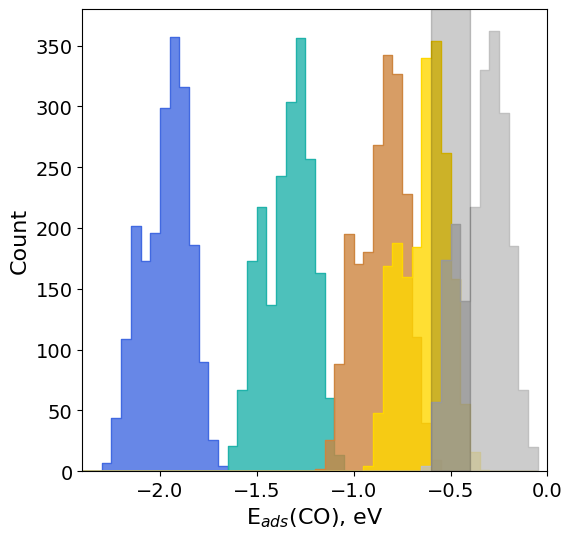

In [ ]:
from matplotlib.patches import Patch

df_plot_equimolar = df_ase_pdpt_20.query('Ag == 20 & Au == 20 & Cu == 20')

n_sites = len(df_plot_equimolar)
n_sites_06_04 = len(df_plot_equimolar.query('E_ads > -0.6 and E_ads < -0.4'))

print(f'Percentage of sites with Eads between -0.6 and -0.4: {n_sites_06_04/n_sites*100:.2f}%')

fig, ax = plt.subplots(figsize=(6,6))

hue_order = ['Ag','Au','Cu','Pd','Pt']

sns.histplot(data=df_plot_equimolar, x='E_ads', element='step', fill=True, hue_order=hue_order,
             alpha=0.8, bins=np.arange(-2.5,0.0,0.05), color='dodgerblue', hue='site_metal',
             palette=metal_colors, ax=ax)

ax.set_xlim(-2.4, 0)

# figure out which metals still have points in that window
x0, x1 = ax.get_xlim()
visible = []
for m in metal_colors:
    vals = df_plot_equimolar.loc[df_plot_equimolar['site_metal']==m, 'E_ads']
    if ((vals >= x0) & (vals <= x1)).any():
        visible.append(m)

# create proxy legend‐patches for just those
legend_handles = [Patch(facecolor=metal_colors[m], label=m) 
                  for m in visible]

#ax.legend(handles=legend_handles, title='Bonding Metal', fontsize=12, title_fontsize=12)
ax.legend().remove()

# Shade the region between -0.6 and -0.4
plt.axvspan(-0.6, -0.4, color='black', alpha=0.2)
plt.xlabel(r'E$_{ads}$(CO), eV', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

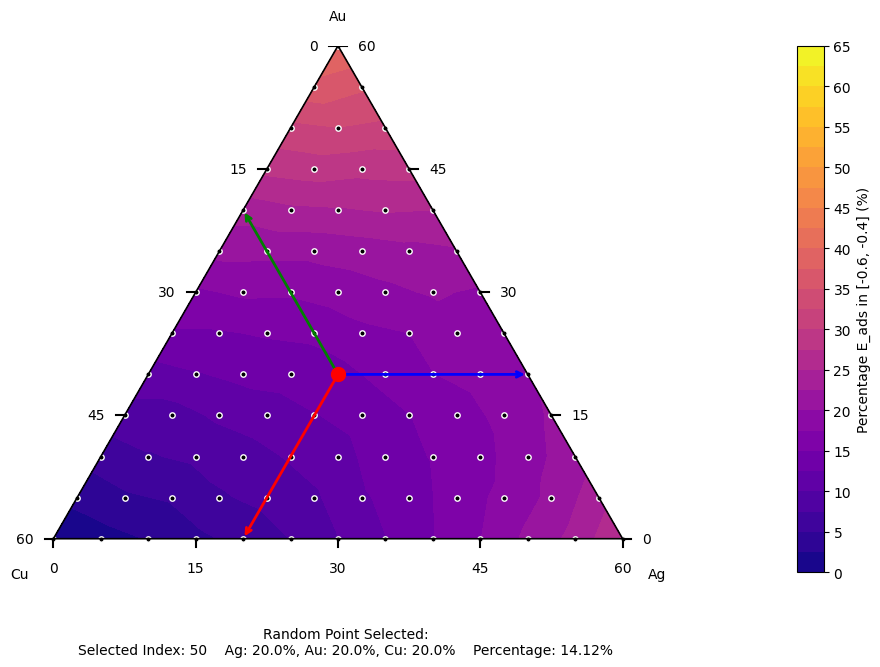

In [25]:
ternary_plot(summary_df, column_name='Percentage E_ads in [-0.6, -0.4] (%)', total=60, max_lvl=65, num_lv=27, ref_point={'Ag':20, 'Au':20, 'Cu':20}, n_ticks=5)

In [19]:
mask2 = (
    (df_ase_pdpt_20['centre_e'] == 'Au') &
    df_ase_pdpt_20[['surf_c_5', 'surf_c_6']]
      .eq('Cu').any(axis=1)
)
# Combine the two conditions and create the boolean column
df_ase_pdpt_20['Condition Cu-Au'] = mask2

# (Optional) Ensure the new column is of boolean dtype
df_ase_pdpt_20['Condition Cu-Au'] = df_ase_pdpt_20['Condition Cu-Au'].astype(bool)

true_count = df_ase_pdpt_20['Condition Cu-Au'].sum()
print("Number of True:", true_count)

pct_series_PdPt_20 = (
    df_ase_pdpt_20
    .groupby(['Ag','Au','Cu','Pd','Pt'])['Condition Cu-Au']
    .mean()
    * 100            
)

df_pct_PdPt_20 = pct_series_PdPt_20.reset_index(name='Condition Cu-Au (%)')
df_pct_PdPt_20['Condition Cu-Au (%)'] = df_pct_PdPt_20['Condition Cu-Au (%)'].round(2)


# Data is filtered by two conditions now, Eads within activity window (-0.6 eV to -0.4 eV) and Cu-Au condition
df_ase_pdpt_20['Eads_condition'] = df_ase_pdpt_20['E_ads'].between(-0.6, -0.4)
df_ase_pdpt_20['double_condition'] = (df_ase_pdpt_20['Condition Cu-Au'] & df_ase_pdpt_20['Eads_condition'])

# Group the data
group_cols = ['Ag', 'Au', 'Cu', 'Pd', 'Pt']
df_two_cond_PdPt_20 = (
    df_ase_pdpt_20
    .groupby(group_cols)['double_condition']
    .mean()
    .mul(100)
    .reset_index(name='double_condition_percentage')
)

df_two_cond_PdPt_20

Number of True: 31427


,Ag,Au,Cu,Pd,Pt,double_condition_percentage
0,0,0,60,20.0,20.0,0.00
1,0,5,55,20.0,20.0,2.23
2,0,10,50,20.0,20.0,3.84
3,0,15,45,20.0,20.0,5.55
4,0,20,40,20.0,20.0,6.18
...,...,...,...,...,...,...
86,50,5,5,20.0,20.0,0.09
87,50,10,0,20.0,20.0,0.00
88,55,0,5,20.0,20.0,0.00
89,55,5,0,20.0,20.0,0.00


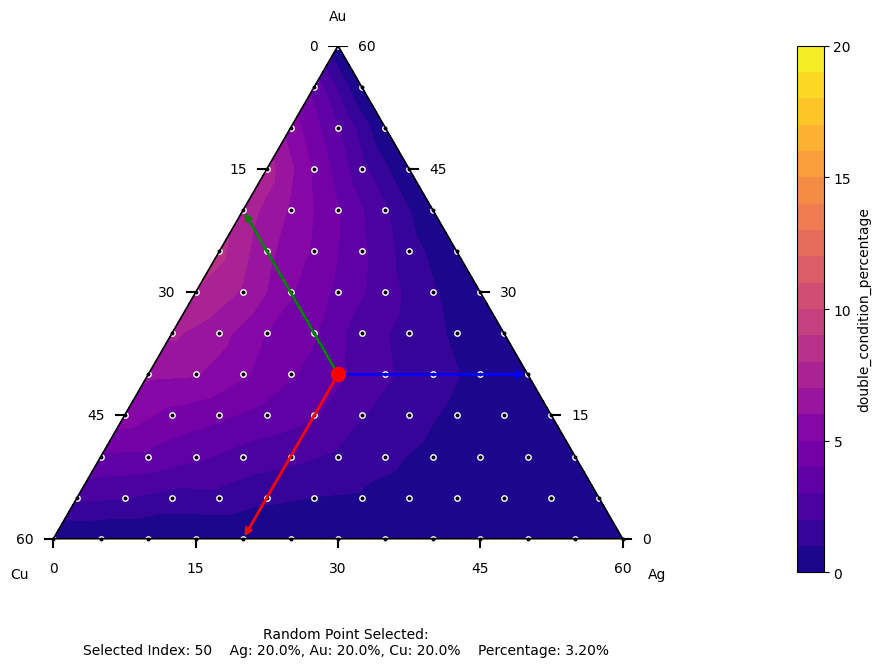

In [23]:
ternary_plot(df_two_cond_PdPt_20, column_name='double_condition_percentage', total=60, max_lvl=20, num_lv=21, ref_point={'Ag':20, 'Au':20, 'Cu':20}, n_ticks=5)